In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

IRMAS_PATH = "/content/drive/MyDrive/ITCS 5156 project/IRMAS dataset/IRMAS-TrainingData/"
JSON_PATH = "/content/drive/MyDrive/ITCS 5156 project/IRMAS dataset/json_files/"

Mounted at /content/drive


In [2]:
%matplotlib inline
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt

In [3]:
filename = "irmas_data_mfcc13_hop_length256_n_fft2048.json"
with open(JSON_PATH+filename, "r") as f:
  data = json.load(f)
data.keys()

dict_keys(['metadata', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '1

In [4]:
len(data.keys())

6705

In [5]:
#This may need to be edited to work with other data
X = []
Ts = []

for i in range(len(data.keys())-1):
  tblock=[]
  X.append(np.array(data['{}'.format(i)]['mfccs']).flatten())
  for key in ['primary_instrument', 'drums', 'genre']:
    tblock.append(data['{}'.format(i)][key])
  Ts.append(tblock)


In [6]:
instruments = ["cel", "cla", "flu", "gac", "gel", "org", "pia",
               "sax", "tru", "vio", "voi"]
drums = ["nod", "dru",'']
genre = ["cou_fol", "cla", "pop_roc", "lat_sou",'jaz_blu','---']


In [7]:
T=[]
for t in Ts:
  T.append([instruments.index(t[0]),drums.index(t[1]),genre.index(t[2])])

In [8]:
pca = PCA()

X_pca = pca.fit_transform(X)

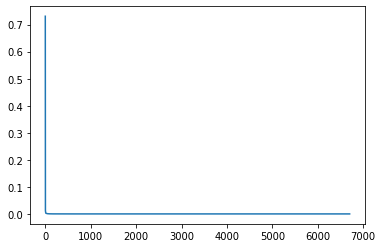

In [9]:
plt.plot(pca.explained_variance_ratio_)

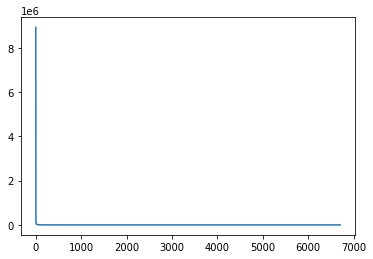

In [15]:
plt.plot(pca.explained_variance_)

In [10]:
pca.explained_variance_ratio_

array([7.30951100e-01, 5.54550846e-02, 2.59595003e-02, ...,
       6.97716144e-33, 6.97716144e-33, 8.43313486e-35])

In [11]:
#This can be tuned to to keep or discard as much as we want
keeps=pca.explained_variance_ratio_>1e-5
keeps

array([ True,  True,  True, ..., False, False, False])

In [12]:
Xpc=np.delete(X,np.where(keeps==False),1)

In [13]:
Xpc.shape

(6704, 751)

In [14]:
Xvdu,Xvds,Xvdvh=np.linalg.svd(X)

KeyboardInterrupt: ignored